In [2]:
# two truths
# more trying

import graspy
import matplotlib.pyplot as plt
import numpy as np

from graspy.simulations import sbm
from graspy.embed import AdjacencySpectralEmbed, LaplacianSpectralEmbed
from graspy.plot import heatmap, pairplot
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from pyclust.brute_cluster_pyclust import brute_cluster

%matplotlib inline


def ase_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2):
    # GMM * ASE
    ase = AdjacencySpectralEmbed(n_components=d,check_lcc=False)
    ase_Xhat = ase.fit_transform(undirected_sbm)
    gmm_ase = GaussianMixture(n_components=k).fit(ase_Xhat)
    ase_gmm = gmm_ase.predict(ase_Xhat)
    # ase_bru,_,_,_,_,_ = brute_cluster(ase_Xhat,ks = range(1,3))
    # ase_gmm = ase_bru.copy()
    ase_ari = np.zeros((1,3))
    ase_ari[0,0] = adjusted_rand_score(labels_lr, ase_gmm)    
    ase_ari[0,1] = adjusted_rand_score(labels_gw, ase_gmm)
    ase_ari[0,2] = ase_ari[0,0] - ase_ari[0,1]
    # print("ase: ",ase_ari)
    return ase_ari
    
def lse_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2):
    # GMM * LSE
    lse = LaplacianSpectralEmbed(n_components=d,check_lcc=False)
    lse_Xhat = lse.fit_transform(undirected_sbm)
    gmm_lse = GaussianMixture(n_components=k).fit(lse_Xhat)
    lse_gmm = gmm_lse.predict(lse_Xhat)
    #lse_bru,_,_,_,_,_ = brute_cluster(lse_Xhat,ks = range(1,3))
    #lse_gmm = lse_bru.copy()
    lse_ari = np.zeros((1,3))
    lse_ari[0,0] = adjusted_rand_score(labels_lr, lse_gmm)    
    lse_ari[0,1] = adjusted_rand_score(labels_gw, lse_gmm)
    lse_ari[0,2] = lse_ari[0,0] - lse_ari[0,1]
    # print("lse: ",lse_ari)
    return lse_ari


Text(0.5, 0.98, 'Clustering Assessment via ARI, n = 800, 300 times')

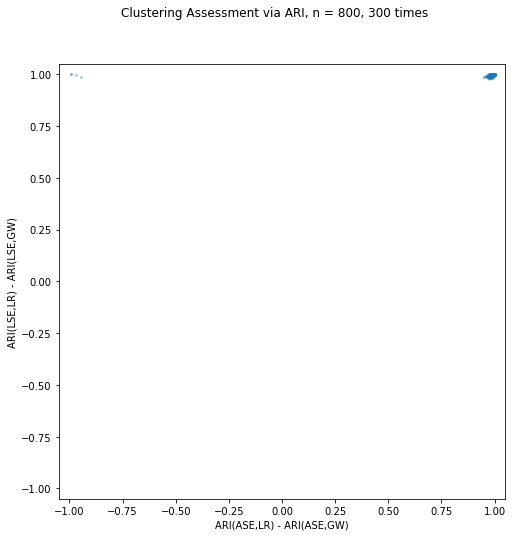

In [8]:
np.random.seed(3000)
times=300
n_verts = 800
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)
P = np.array([[0.020, 0.044, 0.002, 0.009],
              [0.044, 0.115, 0.010, 0.042],
              [0.002, 0.010, 0.020, 0.045],
              [0.009, 0.042, 0.045, 0.117]])

sgc = np.zeros((times,2,3))
for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)

fig=plt.figure(figsize=(8,8))
plt.scatter(sgc[:,0,2],sgc[:,1,2],s=3.5,alpha = 0.3)
# plt.colorbar()
plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.xlabel('ARI(ASE,LR) - ARI(ASE,GW)')
plt.ylabel('ARI(LSE,LR) - ARI(LSE,GW)')
fig.suptitle('Clustering Assessment via ARI, n = 800, 300 times')
# plt.legend('x12y')

Text(0.5, 0.98, 'Clustering Assessment via ARI, n = 400, 1000 times')

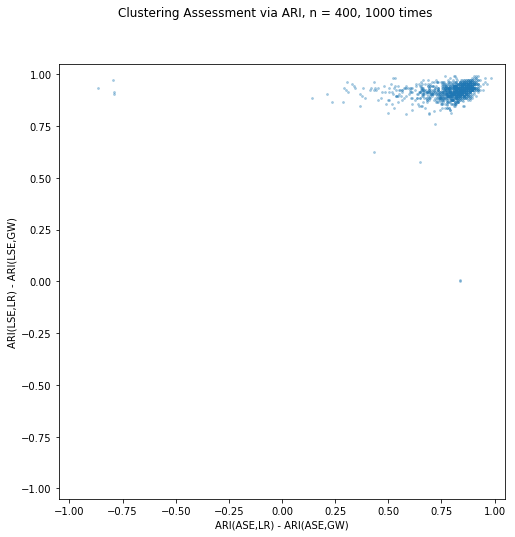

In [11]:
np.random.seed(3000)
times=1000
n_verts = 400
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)
P = np.array([[0.020, 0.044, 0.002, 0.009],
              [0.044, 0.115, 0.010, 0.042],
              [0.002, 0.010, 0.020, 0.045],
              [0.009, 0.042, 0.045, 0.117]])

sgc = np.zeros((times,2,3))
for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)

fig=plt.figure(figsize=(8,8))
plt.scatter(sgc[:,0,2],sgc[:,1,2],s=3.5,alpha = 0.3)
# plt.colorbar()
plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.xlabel('ARI(ASE,LR) - ARI(ASE,GW)')
plt.ylabel('ARI(LSE,LR) - ARI(LSE,GW)')
fig.suptitle('Clustering Assessment via ARI, n = 400, 1000 times')
# plt.legend('x12y')

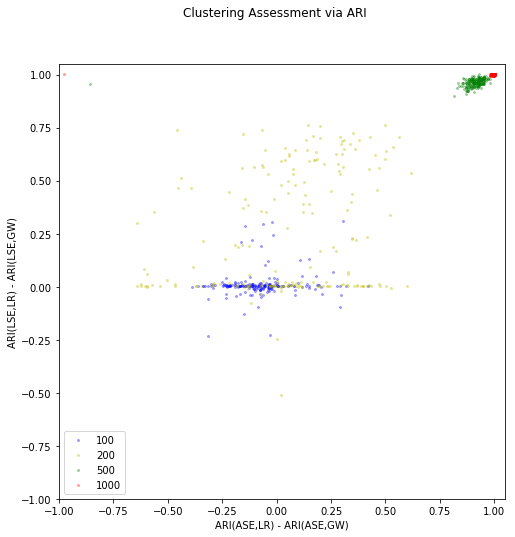

In [12]:
np.random.seed(3000)
times=200
n_verts = 100
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)
P = np.array([[0.020, 0.044, 0.002, 0.009],
              [0.044, 0.115, 0.010, 0.042],
              [0.002, 0.010, 0.020, 0.045],
              [0.009, 0.042, 0.045, 0.117]])

sgc = np.zeros((times,2,3))
for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)

fig=plt.figure(figsize=(8,8))
s1=plt.scatter(sgc[:,0,2],sgc[:,1,2],c='b',s=4,alpha = 0.3)
# plt.colorbar()
plt.xlim(-1,1.05)
plt.ylim(-1,1.05)
# plt.axis("equal")
plt.xlabel('ARI(ASE,LR) - ARI(ASE,GW)')
plt.ylabel('ARI(LSE,LR) - ARI(LSE,GW)')
fig.suptitle('Clustering Assessment via ARI')
# plt.legend('x12y')

times=200
n_verts = 200
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)

for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
s2=plt.scatter(sgc[:,0,2],sgc[:,1,2],c='y',s=4,alpha = 0.3)

times=200
n_verts = 500
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)

for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
s3=plt.scatter(sgc[:,0,2],sgc[:,1,2],c='g',s=4,alpha = 0.3)
 
times=200
n_verts = 1000
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)

for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
s4=plt.scatter(sgc[:,0,2],sgc[:,1,2],c='r',s=4,alpha = 0.3)

plt.legend(handles = [s1, s2, s3 ,s4], labels = ['100', '200', '500', '1000'], loc = 'best')

In [24]:
def ase_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2):
    # pyclust * ASE
    ase = AdjacencySpectralEmbed(n_components=d,check_lcc=False)
    ase_Xhat = ase.fit_transform(undirected_sbm)
    #gmm_ase = GaussianMixture(n_components=k).fit(ase_Xhat)
    #ase_gmm = gmm_ase.predict(ase_Xhat)
    ase_bru,_,_,_,_,_ = brute_cluster(ase_Xhat,ks = range(1,3),affinities=['none','euclidean','manhattan'],graphList='true')
    ase_gmm = ase_bru.copy()
    ase_ari = np.zeros((1,3))
    ase_ari[0,0] = adjusted_rand_score(labels_lr, ase_gmm)    
    ase_ari[0,1] = adjusted_rand_score(labels_gw, ase_gmm)
    ase_ari[0,2] = ase_ari[0,0] - ase_ari[0,1]
    # print("ase: ",ase_ari)
    return ase_ari
    
def lse_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2):
    # pyclust * LSE
    lse = LaplacianSpectralEmbed(n_components=d,check_lcc=False)
    lse_Xhat = lse.fit_transform(undirected_sbm)
    #gmm_lse = GaussianMixture(n_components=k).fit(lse_Xhat)
    #lse_gmm = gmm_lse.predict(lse_Xhat)
    lse_bru,_,_,_,_,_ = brute_cluster(lse_Xhat,ks = range(1,3),affinities=['none','euclidean','manhattan'],graphList='true')
    lse_gmm = lse_bru.copy()
    lse_ari = np.zeros((1,3))
    lse_ari[0,0] = adjusted_rand_score(labels_lr, lse_gmm)    
    lse_ari[0,1] = adjusted_rand_score(labels_gw, lse_gmm)
    lse_ari[0,2] = lse_ari[0,0] - lse_ari[0,1]
    # print("lse: ",lse_ari)
    return lse_ari

Text(0.5, 0.98, 'Clustering Assessment via ARI, n = 400')

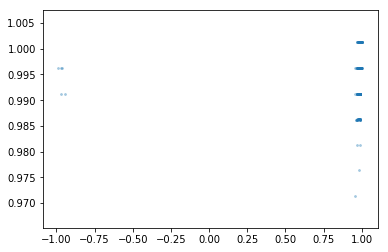

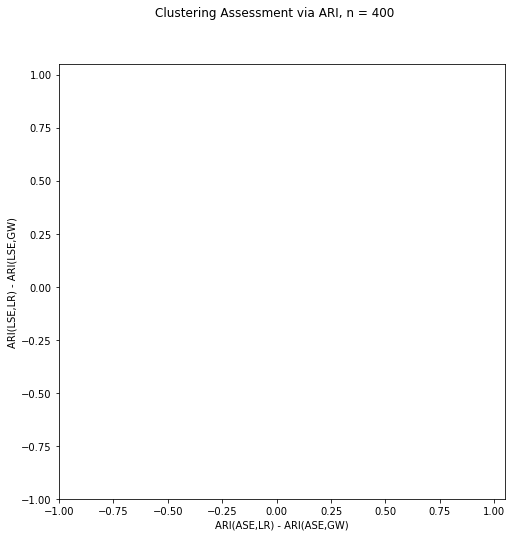

In [25]:
np.random.seed(3000)
times=300
n_verts = 800
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)
P = np.array([[0.020, 0.044, 0.002, 0.009],
              [0.044, 0.115, 0.010, 0.042],
              [0.002, 0.010, 0.020, 0.045],
              [0.009, 0.042, 0.045, 0.117]])

sgc = np.zeros((times,2,3))
for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)

fig=plt.figure(figsize=(8,8))
plt.scatter(sgc[:,0,2],sgc[:,1,2],s=3.5,alpha = 0.3)
# plt.colorbar()
plt.xlim(-1,1.05)
plt.ylim(-1,1.05)
plt.xlabel('ARI(ASE,LR) - ARI(ASE,GW)')
plt.ylabel('ARI(LSE,LR) - ARI(LSE,GW)')
fig.suptitle('Pyclustering Assessment via ARI, n = 800, 300 times')
# plt.legend('x12y')

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


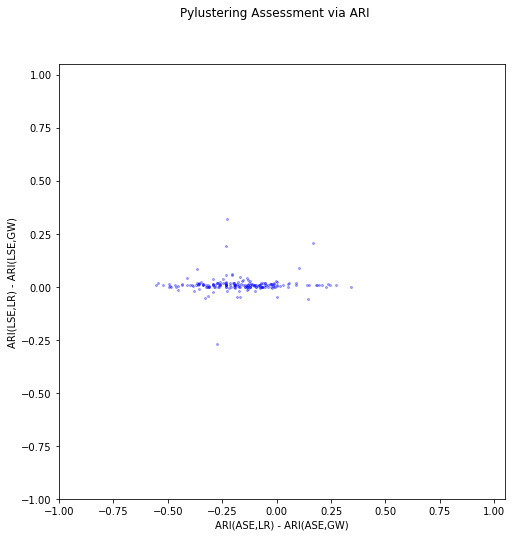

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


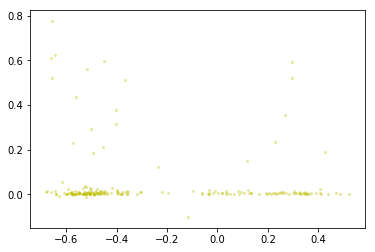

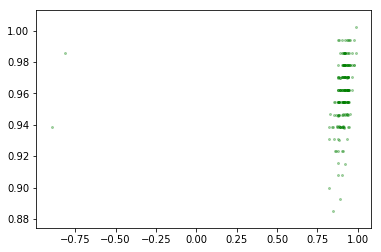

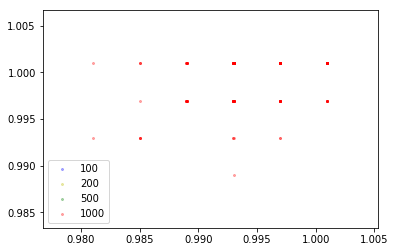

In [27]:
# pyclust
np.random.seed(3000)
times=200
n_verts = 100
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)
P = np.array([[0.020, 0.044, 0.002, 0.009],
              [0.044, 0.115, 0.010, 0.042],
              [0.002, 0.010, 0.020, 0.045],
              [0.009, 0.042, 0.045, 0.117]])

sgc = np.zeros((times,2,3))
for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)

fig=plt.figure(figsize=(8,8))
s1=plt.scatter(sgc[:,0,2],sgc[:,1,2],c='b',s=4,alpha = 0.3)
# plt.colorbar()
plt.xlim(-1,1.05)
plt.ylim(-1,1.05)
# plt.axis("equal")
plt.xlabel('ARI(ASE,LR) - ARI(ASE,GW)')
plt.ylabel('ARI(LSE,LR) - ARI(LSE,GW)')
fig.suptitle('Pylustering Assessment via ARI')
# plt.legend('x12y')

times=200
n_verts = 200
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)

for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
s2=plt.scatter(sgc[:,0,2],sgc[:,1,2],c='y',s=4,alpha = 0.3)

times=200
n_verts = 500
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)

for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
s3=plt.scatter(sgc[:,0,2],sgc[:,1,2],c='g',s=4,alpha = 0.3)
 
times=200
n_verts = 1000
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)

for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
s4=plt.scatter(sgc[:,0,2],sgc[:,1,2],c='r',s=4,alpha = 0.3)

plt.legend(handles = [s1, s2, s3 ,s4], labels = ['100', '200', '500', '1000'], loc = 'best')

In [28]:
# Find two-truths phenomenon graph
np.random.seed(3000)
times=300
n_verts = 800
labels_sbm = int(0.28 * n_verts) * ["LG"] + int(0.22 * n_verts) * ["LW"] + int(0.28 * n_verts) * ["RG"] + int(0.22 * n_verts) * ["RW"]
labels_lr = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [0] + int(0.28*n_verts) * [1] + int(0.22*n_verts) * [1] #true label
labels_gw = int(0.28 * n_verts) * [0] + int(0.22*n_verts) * [1] + int(0.28*n_verts) * [0] + int(0.22*n_verts) * [1] #true label
n_verts = int(0.28 * n_verts) + int(0.22*n_verts) + int(0.28*n_verts) + int(0.22*n_verts)
P = np.array([[0.020, 0.044, 0.002, 0.009],
              [0.044, 0.115, 0.010, 0.042],
              [0.002, 0.010, 0.020, 0.045],
              [0.009, 0.042, 0.045, 0.117]])

tw_graph=np.zeros((800,800,10))
tw_numb=np.zeros((2,10))
j=0
sgc = np.zeros((times,2,3))
for i in range(times):
    undirected_sbm = sbm([int(0.28 *n_verts),int(0.22 *n_verts),int(0.28 *n_verts),int(0.22 *n_verts)], P)
    sgc[i,0,:]= ase_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_pyclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    if (sgc[i,0,2]<-0.7)and(sgc[i,1,2]>0.7):
        tw_graph[:,:,j]=undirected_sbm.copy()
        tw_numb[:,j]=[j,i]
        j=j+1

print("Number of two-truths graph=",str(j))
print(tw_numb)

Number of two-truths graph= 5
[[  0.   1.   2.   3.   4.   0.   0.   0.   0.   0.]
 [ 30.  39. 123. 182. 221.   0.   0.   0.   0.   0.]]


In [29]:
# Recheck the two-truths phenomenon using GMM
for i in range(j):
    undirected_sbm = tw_graph[:,:,i]
    sgc[i,0,:]= ase_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_clu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    print()
    if (sgc[i,0,2]<0.7)or(sgc[i,1,2]<0.7):
        print(i," : GMM is False")
    

In [38]:
def ase_kclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2):
    # kmeans * ASE
    ase = AdjacencySpectralEmbed(n_components=d,check_lcc=False)
    ase_Xhat = ase.fit_transform(undirected_sbm)
    #gmm_ase = GaussianMixture(n_components=k).fit(ase_Xhat)
    #ase_gmm = gmm_ase.predict(ase_Xhat)
    # ase_bru,_,_,_,_,_ = brute_cluster(ase_Xhat,ks = range(1,3))
    # ase_gmm = ase_bru.copy()
    ase_kmeans = KMeans(n_clusters=2).fit_predict(ase_Xhat)
    ase_ari = np.zeros((1,3))
    ase_ari[0,0] = adjusted_rand_score(labels_lr, ase_kmeans)    
    ase_ari[0,1] = adjusted_rand_score(labels_gw, ase_kmeans)
    ase_ari[0,2] = ase_ari[0,0] - ase_ari[0,1]
    # print("ase: ",ase_ari)
    return ase_ari
    
def lse_kclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2):
    # kmeans * LSE
    lse = LaplacianSpectralEmbed(n_components=d,check_lcc=False)
    lse_Xhat = lse.fit_transform(undirected_sbm)
    #gmm_lse = GaussianMixture(n_components=k).fit(lse_Xhat)
    #lse_gmm = gmm_lse.predict(lse_Xhat)
    #lse_bru,_,_,_,_,_ = brute_cluster(lse_Xhat,ks = range(1,3))
    #lse_gmm = lse_bru.copy()
    lse_kmeans = KMeans(n_clusters=2).fit_predict(lse_Xhat)
    lse_ari = np.zeros((1,3))
    lse_ari[0,0] = adjusted_rand_score(labels_lr, lse_kmeans)    
    lse_ari[0,1] = adjusted_rand_score(labels_gw, lse_kmeans)
    lse_ari[0,2] = lse_ari[0,0] - lse_ari[0,1]
    # print("lse: ",lse_ari)
    return lse_ari


In [41]:
# Recheck the two-truths phenomenon using Kmeans
for i in range(j):
    undirected_sbm = tw_graph[:,:,i]
    sgc[i,0,:]= ase_kclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    sgc[i,1,:]= lse_kclu(undirected_sbm , n_verts,labels_lr, labels_gw, d=2,k=2)
    # print(sgc[i,:,:])
    if (sgc[i,0,2]<0.7)or(sgc[i,1,2]<0.7):
        print(i," : Kmeans is False")


[[ 0.97512512 -0.00122889  0.97635401]
 [ 0.98503752 -0.00122889  0.98626641]]
[[ 0.98007506 -0.00121036  0.98128543]
 [ 0.9900125  -0.00123507  0.99124757]]
[[ 0.97512512 -0.00108068  0.97620581]
 [ 0.9900125  -0.00121036  0.99122286]]
[[ 1.         -0.00123507  1.00123507]
 [ 0.99499999 -0.00122889  0.99622888]]
[[ 0.9900125  -0.00123507  0.99124757]
 [ 0.99499999 -0.00122889  0.99622888]]


SBM "B" matrix:
[[0.01945153 0.04312094 0.00201291 0.00885248]
 [0.04312094 0.11266787 0.0096388  0.0426782 ]
 [0.00201291 0.0096388  0.01973055 0.0438058 ]
 [0.00885248 0.0426782  0.0438058  0.11686467]]


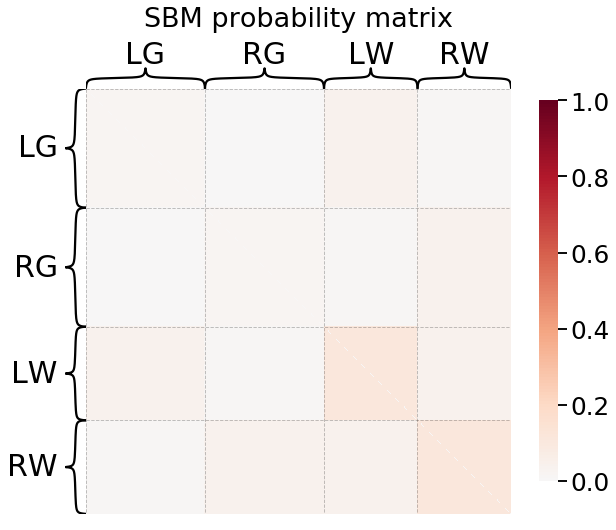

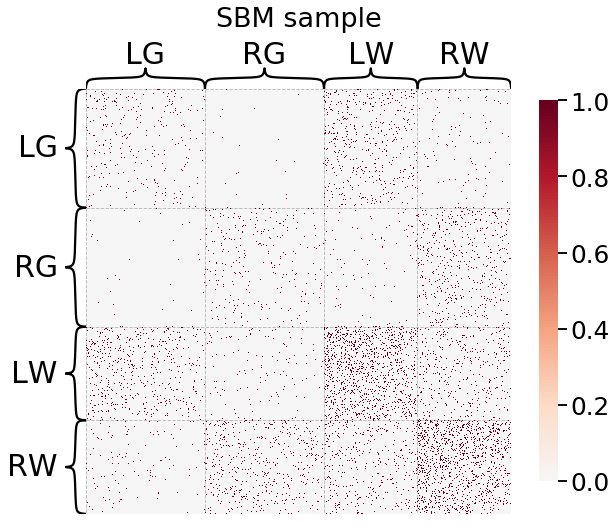

In [34]:
undirected_sbm = tw_graph[:,:,0]

from graspy.models import SBMEstimator
sbme = SBMEstimator(directed=True,loops=False)
sbme.fit(undirected_sbm, y=labels_sbm)
print("SBM \"B\" matrix:")
print(sbme.block_p_)
heatmap(sbme.p_mat_,
        inner_hier_labels=labels_sbm,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="SBM probability matrix")
heatmap(sbme.sample()[0],
        inner_hier_labels=labels_sbm,
        font_scale=1.5,
        title="SBM sample");